X, formerly known as Twitter, has a set of rules they expect the users of the platform to abide by. Last year, I scraped over 64M tweets and wrote a set of programs to identify which of those tweets were deleted by (then) Twitter. I explored this project to verify that the platform was following their rules when determining what tweets to delete and not being biased in their approach. In summary, a majority, of the tweets I found to be deleted could be labelled as some sort of hate speech, and my concerns about bias in Twitter’s approach dissipated. 

When reading through some of the “censored” tweets, I wiped the blood from my eyes that came from all the hate speech, and I found some tweets that the author may have benefited from some sort of warning to tell them that their tweet may be deleted. For example, an author may be trying to get a point across to a congress person about something he or she felt strongly about; unfortunately, they probably felt too strongly, and their rhetoric “crossed the line.” I thought, “wouldn’t it be cool if a tweet author was prompted to consider re-writing their tweet so that it does not get taken down from the platform team?” This is the crux of my project proposal: train a model to predict a tweet will be deleted from the platform.

In this project, I will use two different techniques to vectorize the tweet data: 
 - spaCy
 - Scikit Learn's TFIDF vectorizer

From there, we will deploy 4 techniques to each of these vectorizers:
 - Custom built KNN Classifier using cosine similarity
 - Scikit KNN Classifier using PCA
 - Cross-Validation using RandomForestClassifier
 - Kmeans Clustering
 
For more information about how I gathered this data, check out my blog and github:
 - Blog: https://inthegraey.com/
 - Github: https://github.com/madecero/thegraey
 
NOTE: This notebook takes the projectdf.csv created from FinalProject_db_to_csv.ipynb. Refer to that notebook on how the dataset was created to perform the below analysis.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('projectdf.csv')

In [3]:
df.head()

,ID,Text,CreatedAt,deleteReason
0,1474541778120450049,RT @McQueenRH: new active list now! come get a...,Sat Dec 25 00:45:30 2021,0
1,1474549365578645506,RT @thatboicandy: @mooncat2878 @tezos @TempleW...,Sat Dec 25 01:15:39 2021,0
2,1474553150841376770,RT @btsvotingorg: Collect more hearts and regi...,Sat Dec 25 01:30:41 2021,0
3,1474579650475134983,Instead of saying English is not a desi langua...,Sat Dec 25 03:15:59 2021,0
4,1474621084993343494,🎶 It came upon a midnight cloudy...\n\n...the ...,Sat Dec 25 06:00:38 2021,0


In [4]:
df.shape

(11153, 4)

### Now let's seperate our data into x and y variables

In [5]:
text = df.iloc[:, 1:2]  # Selects only the second column
target = df.iloc[:, -1:]    # Selects the last column

In [6]:
text.head()

,Text
0,RT @McQueenRH: new active list now! come get a...
1,RT @thatboicandy: @mooncat2878 @tezos @TempleW...
2,RT @btsvotingorg: Collect more hearts and regi...
3,Instead of saying English is not a desi langua...
4,🎶 It came upon a midnight cloudy...\n\n...the ...


In [7]:
target.head()

,deleteReason
0,0
1,0
2,0
3,0
4,0


In [8]:
text.shape

(11153, 1)

In [9]:
target.shape

(11153, 1)

### Vectorize tweets using spaCy

In [10]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [11]:
#Let's vectorize one row to see how it looks
first_row = text.iloc[0]
tweet = first_row['Text']
print (tweet)

RT @McQueenRH: new active list now! come get a halo 🎄💗


In [12]:
doc = nlp(tweet)
vector = doc.vector
print (vector)

[ 2.20960304e-01 -1.22759208e-01  2.15596542e-01 -2.87257992e-02
  1.14529744e-01 -7.57146850e-02  3.55610880e-03  3.31563763e-02
  4.17150408e-01 -1.84260011e-01 -1.71363562e-01 -1.24324048e-02
 -4.75963682e-01  1.53285429e-01 -3.50125372e-01 -3.94094400e-02
 -2.33767599e-01 -5.13015315e-02 -3.10330302e-01 -9.62963030e-02
  1.24893129e-01  4.26056594e-01 -3.71111453e-01  2.25131482e-01
  7.93977454e-02  3.52302074e-01  2.30065390e-01  4.61123258e-01
  5.63240494e-04 -3.96967888e-01  5.55405378e-01  3.32233496e-02
 -4.22298461e-01 -2.81363398e-01 -4.54657733e-01 -2.51103967e-01
  3.50866877e-02  3.84568125e-01  1.10567831e-01 -4.35572863e-01
 -2.08961278e-01 -1.91250905e-01 -2.69444644e-01 -2.19360694e-01
 -8.11840892e-02 -1.54547244e-01  3.01249772e-01 -8.61592650e-01
  6.04930103e-01 -2.54548918e-02 -3.39795828e-01 -2.60081410e-01
 -8.46456811e-02  2.19316152e-03  1.87529847e-01 -1.25788316e-01
  5.67415178e-01  1.29818782e-01  3.68099250e-02 -4.02405500e-01
 -6.85994849e-02 -3.62753

In [13]:
vector.shape

(96,)

In [14]:
#Now let's create a dataframe of vectors that will serve as our x variables

# Create an empty list to store the vectors
vectors = []

# Iterate through the 'Text' column and convert each text to a vector
for tweet in text['Text']:
    # Parse the text using spaCy
    doc = nlp(tweet)
    
    # Get the vector for the entire text
    text_vector = doc.vector
    
    # Append the vector to the list
    vectors.append(text_vector)

# Create a new DataFrame with the vectors
vectordf_spacy = pd.DataFrame(vectors, columns=[f"vec_{i}" for i in range(len(vectors[0]))])

In [15]:
vectordf_spacy.head()

,vec_0,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9,...,vec_86,vec_87,vec_88,vec_89,vec_90,vec_91,vec_92,vec_93,vec_94,vec_95
0,0.220960,-0.122759,0.215597,-0.028726,0.114530,-0.075715,0.003556,0.033156,0.417150,-0.184260,...,0.075368,-0.060675,0.189251,-0.078255,-0.151470,0.634658,-0.323278,0.132018,0.183330,0.475059
1,0.550239,0.108917,0.253534,-0.010316,0.497340,-0.147699,0.033444,0.457739,0.495571,-0.251674,...,0.088153,0.106767,0.678543,-0.145111,0.374974,0.334290,-0.279379,0.255332,0.154104,0.914357
2,-0.056039,0.094470,-0.033103,-0.013498,-0.028080,-0.078500,0.298846,0.208823,0.790802,-0.272022,...,0.550695,-0.635769,0.007694,0.260594,0.086359,0.276331,-0.223620,0.143518,0.172961,0.465025
3,-0.183103,0.002643,0.204122,-0.009092,0.141403,0.163014,0.141253,-0.035363,0.224903,-0.007595,...,0.033297,0.321065,0.118784,-0.130218,-0.186235,-0.025115,0.139932,0.070673,0.181020,-0.035365
4,-0.038305,0.011922,0.017153,-0.260877,-0.148506,-0.172667,0.379505,-0.097669,0.255290,-0.069746,...,0.230030,-0.013717,0.136523,0.140265,-0.197633,0.170173,-0.223141,0.523440,0.186075,0.226642


### We will call vectordf_spacy later when we run our models for the Spacy vectors. 
### 
### Let us first also create vectors using sklearn's TFIDF Vectorizer so we can do some comparisons.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer(encoding='utf-8', stop_words = 'english')

# Fit and transform the tweets
tfidf_matrix = vectorizer.fit_transform(text['Text'])

# Convert the TF-IDF matrix to a DataFrame
vectordf_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns = vectorizer.get_feature_names_out())

In [18]:
vectordf_tfidf.head()

,00,000,0000,000000,000000000032,00000ooooooo,000k,004,0042360,0066_lhc,...,𝚘𝚏,𝚘𝚗,𝚘𝚛,𝚛𝚎𝚊𝚍𝚢,𝚝𝚑𝚎,𝚝𝚘,𝚢𝚘𝚞,𝟏𝐝𝐚𝐲𝐬,𝟐𝐧𝐝,𝟸𝟶
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
vectordf_tfidf.shape

(11153, 38293)

### Let's examine the term weights from the tfidx matrix

In [20]:
#Transpose so the rows are the terms and the columns are the counts in each document
td_tfidf = vectordf_tfidf.T

In [21]:
td_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,11143,11144,11145,11146,11147,11148,11149,11150,11151,11152
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.493207,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000000000032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
td_tfidf.shape

(38293, 11153)

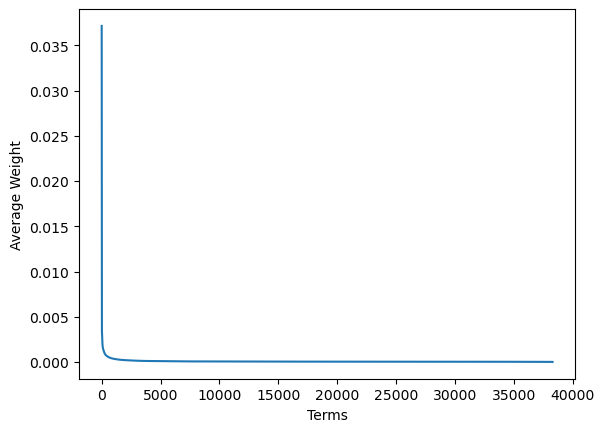

In [23]:
import matplotlib.pyplot as plt
unsortedWeights = td_tfidf.mean(axis=1)

#Plot the distribution
plt.plot(sorted(unsortedWeights, reverse = True))
plt.xlabel('Terms')
plt.ylabel('Average Weight')
plt.show()

In [24]:
#Let's see what the weights look like based on the word.
unsortedWeights.sort_values(inplace = True, ascending = False)
unsortedWeights.head(100)

rt           0.037159
https        0.033812
like         0.009851
just         0.007738
amp          0.007168
               ...   
fuck         0.001632
elonmusk     0.001621
trump        0.001605
song         0.001583
literally    0.001582
Length: 100, dtype: float64

### Because the weights drop off signifcantly, let's limit our terms to only the top 100 weighted words. This will help with processesing.

## We have 2 x-variable matricies we will be analyzing:

1. vectordf_spacy = spaCy vectorized text matrix
2. vectordf_tfidf = tfidf matrix from Scikit Learn

In [25]:
vectordf_spacy.shape

(11153, 96)

In [26]:
vectordf_tfidf.shape

(11153, 38293)

In [27]:
## And 1 y-variable array

In [28]:
target.shape

(11153, 1)

In [29]:
# Split each dataset into train and test sets
from sklearn.model_selection import train_test_split

spacyX_train, spacyX_test = train_test_split(vectordf_spacy, test_size=0.2, random_state=111)
tfidfX_train, tfidfX_test = train_test_split(vectordf_tfidf, test_size=0.2, random_state=111)
y_train, y_test = train_test_split(target, test_size=0.2, random_state=111)

In [30]:
y_test.head()

,deleteReason
4372,0
9255,0
2858,0
9806,0
8307,0


### Model 1: Custom KNN Search

In [31]:
def knn_search(x, D, K):
    """ find K nearest neighbors of an instance x among the instances in D using cosine similarity """
    # first find the vector norm for each instance in D as wel as the norm for vector x
    D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

def knn_classify(x, D, K, labels):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    predicted_label = count.most_common(1)[0][0]
    return neigh_idx, predicted_label

def knn_evaluate(testdata, test_labs, traindata, train_labs, K):
    """ evaluate knn classifier predictions """
    T=0 # no. of correctly classified instances
    F=0 # no. of incorrectly classified instances
    for i in range(len(testdata)):
        actual=test_labs[i]
        top_K_neighbors, predicted = knn_classify(testdata[i], traindata, K, train_labs)
        if actual == predicted:
            T += 1       
        else:
            F += 1     
    accuracy = float(T)/float(T+F) 
    return accuracy

In [32]:
#prep for KNN Classifier

#spacy matrices
spacyX_train_a = np.array(spacyX_train)
spacyX_test_a = np.array(spacyX_test)

#tf idf matricies
tfidfX_train_a = np.array(tfidfX_train)
tfidfX_test_a = np.array(tfidfX_test)

#tfidf matricies
y_train_a = np.array(y_train).flatten()
y_test_a = np.array(y_test).flatten()

In [33]:
knn_evaluate(spacyX_test_a, y_test_a, spacyX_train_a, y_train_a, 10)

0.8951142985208427

In [34]:
knn_evaluate(tfidfX_test_a, y_test_a, tfidfX_train_a, y_train_a, 10)

C:\Users\madec\AppData\Local\Temp\ipykernel_20008\333066813.py:7: RuntimeWarning: invalid value encountered in divide
  sims = np.dot(D,x)/(D_norm * x_norm)


0.9296279695203944

### Those models took quite a long time to run, and the accuracy is not much better than just predicting 0s across the board.

### 

### Let's run Principle Component Analysis on the datasets to see if we can reduce the features and make better predicitons

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
# Standardizing the features
scaler = StandardScaler()

spacyX_scaled = scaler.fit_transform(vectordf_spacy)
tfidfX_scaled = scaler.fit_transform(vectordf_tfidf)

### spaCy PCA

In [37]:
pca = PCA(n_components=96)

spacy_principal_components = pca.fit_transform(spacyX_scaled)

In [38]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[1.41554639e-01 6.70520589e-02 6.00956716e-02 4.22935039e-02
 3.83975282e-02 3.23254503e-02 2.86551137e-02 2.65214052e-02
 2.53401957e-02 2.44394746e-02 2.33242232e-02 2.11428814e-02
 1.99616477e-02 1.78470854e-02 1.75723936e-02 1.65352505e-02
 1.60217285e-02 1.53011065e-02 1.41936811e-02 1.37610324e-02
 1.27557805e-02 1.21998508e-02 1.12805059e-02 1.04361605e-02
 1.00525720e-02 9.80062224e-03 9.57924500e-03 8.94897524e-03
 8.32988322e-03 8.21186043e-03 8.00739415e-03 7.60718342e-03
 7.40227988e-03 7.25218887e-03 7.11507723e-03 6.95700664e-03
 6.62376871e-03 6.44608028e-03 6.32576831e-03 5.81529224e-03
 5.69963781e-03 5.37349330e-03 5.16745681e-03 5.07937605e-03
 5.03947772e-03 4.90447646e-03 4.75544017e-03 4.74241795e-03
 4.70657554e-03 4.42997832e-03 4.39059548e-03 4.19979217e-03
 4.06076061e-03 4.02963907e-03 3.87251214e-03 3.80692538e-03
 3.63514922e-03 3.59677197e-03 3.51579487e-03 3.34743340e-03
 3.33978422e-03 3.26489774e-03 3.08084115e-03 3.00867064e-03
 2.96216621e-03 2.924424

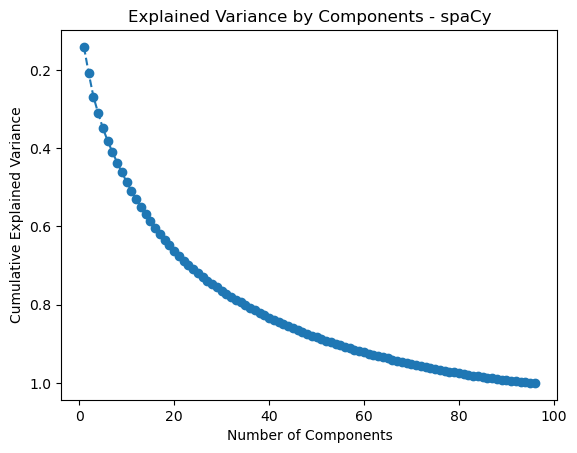

In [39]:
import matplotlib.pyplot as plt

plt.plot(range(1, 97), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components - spaCy')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.gca().invert_yaxis()
plt.show()

### There is not really a significant elbow in the chart. Let's see how tfidf looks

### 

### TFIDF matrix has over 38k features. Per our earlier analysis, it looked like there was a drop of in weights at around 100.

In [40]:
pca = PCA(n_components=100)

tfidf_principal_components = pca.fit_transform(tfidfX_scaled)

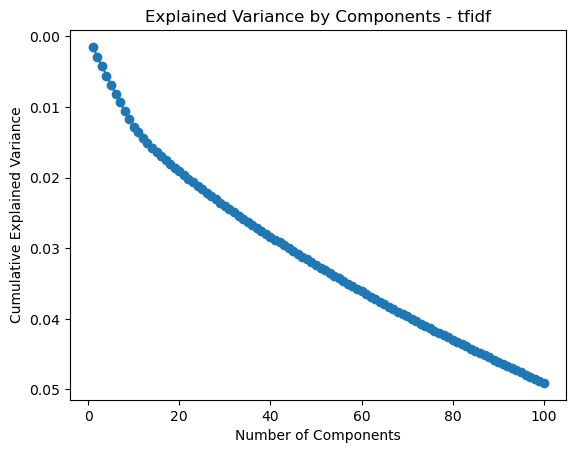

In [41]:
plt.plot(range(1, 101), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components - tfidf')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.gca().invert_yaxis()
plt.show()

### One can argue that there is a slight elbow somewhere around 10.

In [42]:
spacy_pca = PCA(n_components=10)
spacy_principal_components = spacy_pca.fit_transform(spacyX_scaled)

tfidf_pca = PCA(n_components=10)
tfidf_principal_components = tfidf_pca.fit_transform(tfidfX_scaled)

spacy_pca_df = pd.DataFrame(data=spacy_principal_components)
tfidf_pca_df = pd.DataFrame(data=tfidf_principal_components)

In [43]:
spacy_pca_df.shape

(11153, 10)

In [44]:
tfidf_pca_df.shape

(11153, 10)

In [45]:
spacyX_train_pca, spacyX_test_pca = train_test_split(spacy_pca_df, test_size=0.2, random_state=111)
tfidfX_train_pca, tfidfX_test_pca = train_test_split(tfidf_pca_df, test_size=0.2, random_state=111)

In [46]:
#prep for KNN Classifier

#spacy matrices
spacyX_train_pca_a = np.array(spacyX_train_pca)
spacyX_test_pca_a = np.array(spacyX_test_pca)

#tf idf matricies
tfidfX_train_pca_a = np.array(tfidfX_train_pca)
tfidfX_test_pca = np.array(tfidfX_test_pca)

In [47]:
knn_evaluate(spacyX_test_pca_a, y_test_a, spacyX_train_pca_a, y_train_a, 10)

0.8982519049753473

In [48]:
knn_evaluate(tfidfX_test_pca, y_test_a, tfidfX_train_pca_a, y_train_a, 10)

0.9009412819363514

### We lost some accuracy with the reduction in dimensions, but it ran a lot faster. Let's check the sci-kit learn KNN model to see if there is any improvement there, and let's generate a confusion matrix

# Model 2 - Sci-kit Learn KNN Classifier After PCA

In [49]:
from sklearn import neighbors, tree, naive_bayes

In [50]:
k_neighbors = 10

spacy_knnclf = neighbors.KNeighborsClassifier(k_neighbors, weights='distance', metric = 'cosine')
spacy_knnclf.fit(spacyX_train_pca, y_train)

tfidf_knnclf = neighbors.KNeighborsClassifier(k_neighbors, weights='distance', metric = 'cosine')
tfidf_knnclf.fit(tfidfX_train_pca, y_train)

C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

In [51]:
spacy_knnpreds_train = spacy_knnclf.predict(spacyX_train_pca)
spacy_knnpreds_test = spacy_knnclf.predict(spacyX_test_pca)

tfidf_knnpreds_train = tfidf_knnclf.predict(tfidfX_train_pca)
tfidf_knnpreds_test = tfidf_knnclf.predict(tfidfX_test_pca)

In [52]:
print (spacy_knnpreds_train)
print (spacy_knnpreds_test)

print (tfidf_knnpreds_train)
print (tfidf_knnpreds_test)

[1 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [53]:
print(spacy_knnclf.score(spacyX_train_pca, y_train))
print(spacy_knnclf.score(spacyX_test_pca, y_test))

1.0
0.897355445988346


In [54]:
print(tfidf_knnclf.score(tfidfX_train_pca, y_train))
print(tfidf_knnclf.score(tfidfX_test_pca, y_test))

0.9998879175072853
0.9000448229493501


### We have a training accuracy of 100% - even when using only principle components. Let's assess different values of K to see if we can find avoid overfitting.

In [55]:
spacy_train_acc = []
spacy_test_acc = []
tfidf_train_acc = []
tfidf_test_acc = []

for K in range (25, 500, 25):
    spacy_knnclf_train = neighbors.KNeighborsClassifier(K, weights='distance', metric = 'cosine')
    spacy_knnclf_train.fit(spacyX_train_pca, y_train)
    spacy_train_acc.append(spacy_knnclf_train.score(spacyX_train_pca, y_train))

    spacy_knnclf_test = neighbors.KNeighborsClassifier(K, weights='distance', metric = 'cosine')
    spacy_knnclf_test.fit(spacyX_train_pca, y_train)
    spacy_test_acc.append(spacy_knnclf_test.score(spacyX_test_pca, y_test))

    tfidf_knnclf_train = neighbors.KNeighborsClassifier(K, weights='distance', metric = 'cosine')
    tfidf_knnclf_train.fit(tfidfX_train_pca, y_train)
    tfidf_train_acc.append(tfidf_knnclf_train.score(tfidfX_train_pca, y_train))

    tfidf_knnclf_test = neighbors.KNeighborsClassifier(K, weights='distance', metric = 'cosine')
    tfidf_knnclf_test.fit(tfidfX_train_pca, y_train)
    tfidf_test_acc.append(tfidf_knnclf_test.score(tfidfX_test_pca, y_test))

C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

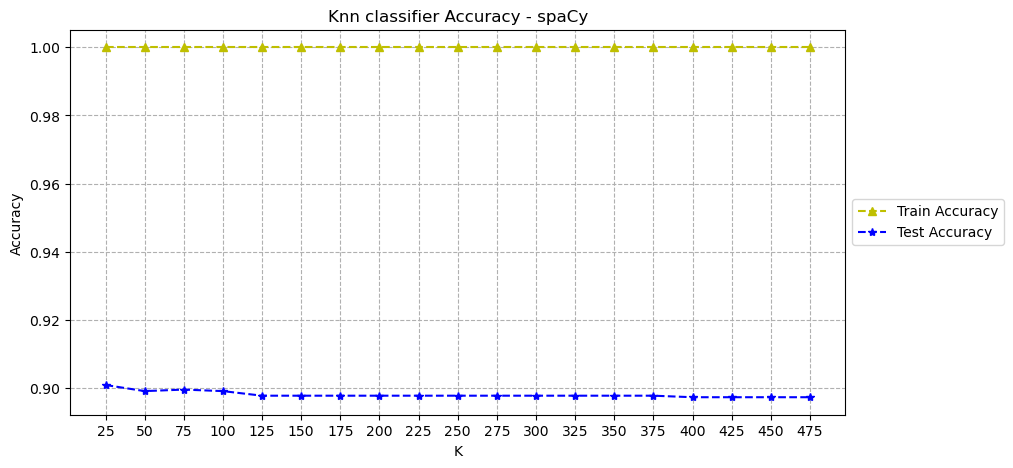

In [56]:
Ks = list(range (25, 500, 25))
plt.figure(figsize=(10,5))
plt.plot(Ks, spacy_train_acc, 'y^--', label='Train Accuracy')
plt.plot(Ks, spacy_test_acc, 'b*--', label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy - spaCy')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

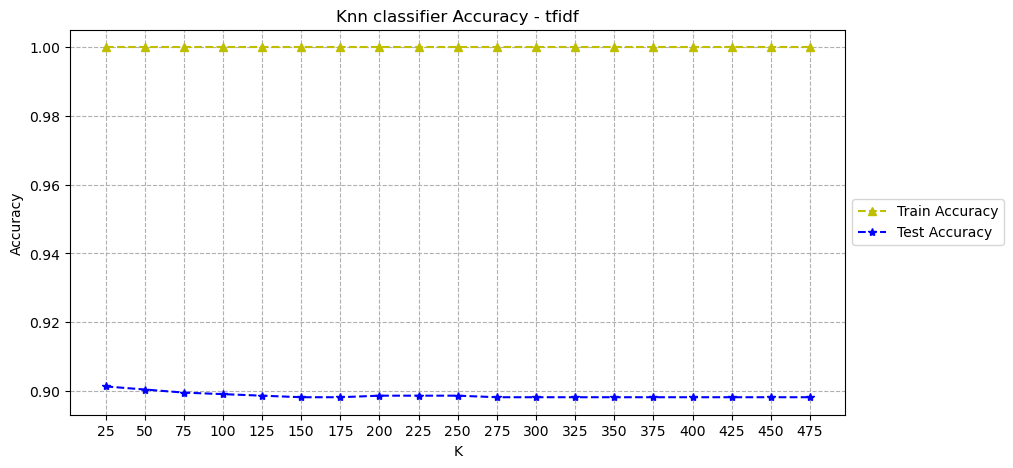

In [57]:
Ks = list(range (25, 500, 25))
plt.figure(figsize=(10,5))
plt.plot(Ks, tfidf_train_acc, 'y^--', label='Train Accuracy')
plt.plot(Ks, tfidf_test_acc, 'b*--', label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy - tfidf')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### No matter how large we make K, and it appears no matter how many features we reduce, we still experience overfitting. Let's try with k = 50

### 

### Let's generate a confusion matrix and other details on tfidf without PCA as that was our best performing model, and it does not seem to have an impact on processing time with sci kit learn's model

In [58]:
k_neighbors = 50

spacy_knnclf = neighbors.KNeighborsClassifier(k_neighbors, weights='distance', metric = 'cosine')
spacy_knnclf.fit(spacyX_train_pca, y_train)

tfidf_knnclf = neighbors.KNeighborsClassifier(k_neighbors, weights='distance', metric = 'cosine')
tfidf_knnclf.fit(tfidfX_train_pca, y_train)

C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='cosine', n_neighbors=50, weights='distance')

In [59]:
spacy_knnpreds_train = spacy_knnclf.predict(spacyX_train_pca)
spacy_knnpreds_test = spacy_knnclf.predict(spacyX_test_pca)

tfidf_knnpreds_train = tfidf_knnclf.predict(tfidfX_train_pca)
tfidf_knnpreds_test = tfidf_knnclf.predict(tfidfX_test_pca)

In [60]:
from sklearn.metrics import confusion_matrix
spacy_test_confusion = confusion_matrix(y_test, spacy_knnpreds_test)
tfidf_test_confusion = confusion_matrix(y_test, tfidf_knnpreds_test)
print(spacy_test_confusion)
print(tfidf_test_confusion)

[[1998    4]
 [ 221    8]]
[[1996    6]
 [ 216   13]]


### These results are not ideal. We are missing way too many true positives. Curious what the confusion matrix looks like for the original dataframes that did not have features reduced.

In [61]:
k_neighbors = 10

spacy_knnclf = neighbors.KNeighborsClassifier(k_neighbors, weights='distance', metric = 'cosine')
spacy_knnclf.fit(spacyX_train, y_train)

tfidf_knnclf = neighbors.KNeighborsClassifier(k_neighbors, weights='distance', metric = 'cosine')
tfidf_knnclf.fit(tfidfX_train, y_train)

C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

In [62]:
spacy_knnpreds_train = spacy_knnclf.predict(spacyX_train)
spacy_knnpreds_test = spacy_knnclf.predict(spacyX_test)

tfidf_knnpreds_train = tfidf_knnclf.predict(tfidfX_train)
tfidf_knnpreds_test = tfidf_knnclf.predict(tfidfX_test)

In [63]:
from sklearn.metrics import confusion_matrix
spacy_test_confusion = confusion_matrix(y_test, spacy_knnpreds_test)
tfidf_test_confusion = confusion_matrix(y_test, tfidf_knnpreds_test)
print(spacy_test_confusion)
print(tfidf_test_confusion)

[[1963   39]
 [ 192   37]]
[[1985   17]
 [ 140   89]]


In [64]:
from sklearn.metrics import classification_report

print ("Classification Report for spaCy Test Data")
print(classification_report(y_test, spacy_knnpreds_test))

print ("Classification Report for tfidf Test Data")
print(classification_report(y_test, tfidf_knnpreds_test))

Classification Report for spaCy Test Data
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2002
           1       0.49      0.16      0.24       229

    accuracy                           0.90      2231
   macro avg       0.70      0.57      0.59      2231
weighted avg       0.87      0.90      0.87      2231

Classification Report for tfidf Test Data
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2002
           1       0.84      0.39      0.53       229

    accuracy                           0.93      2231
   macro avg       0.89      0.69      0.75      2231
weighted avg       0.92      0.93      0.92      2231



### These results are better since we are catching more of the true positives. That said, we are not catching a majority of them. Let's deploy a new technique to see if we can increase accuracy and limit overfitting.

# Model 3 - Cross-Validation using RandomForestClassifier

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [66]:
model = RandomForestClassifier()

In [67]:
scores = cross_val_score(model, spacyX_train, y_train, cv=5)

C:\Users\madec\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\madec\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

In [68]:
print("Scores:", scores)
print("Mean score:", scores.mean())

Scores: [0.89859944 0.90084034 0.89798206 0.8985426  0.89910314]
Mean score: 0.8990135157201895


### We are gaining no improvement. The marginally better model that we have produced so far is using sci kit learn's KNN classifier on the TFIDF weighted vectors.

### 

### Although there is a lot of noise in this data, and the model is overfit, I am still interested in seeing what the model found as false positives.

In [69]:
# Add the predicted labels to your DataFrame
y_test['predicted_labels'] = tfidf_knnpreds_test

# Identify false positives
false_positives = y_test[(y_test['deleteReason'] == 0) & (y_test['predicted_labels'] == 1)]

print (false_positives)

       deleteReason  predicted_labels
7546              0                 1
10273             0                 1
9212              0                 1
2142              0                 1
5025              0                 1
8567              0                 1
10674             0                 1
9089              0                 1
6535              0                 1
4436              0                 1
4816              0                 1
6659              0                 1
9758              0                 1
3095              0                 1
2034              0                 1
4980              0                 1
10626             0                 1


In [70]:
false_positive_indices_list = false_positives.index.tolist()

In [89]:
false_positive_records = df.loc[false_positive_indices_list]
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_rows', 200)
print(false_positive_records['Text'])

7546                                                                                 @Donahta_ Where’s the Body??? iPhone anyway
10273                                                                   @notcapnamerica @Im_X1 White Christians are so loving...
9212                                                                   RT @dynananakook: Want the link?😏 https://t.co/GxB8NNQaiq
2142     RT @UToledo: Our second undergraduate commencement starts soon. Stream live at https://t.co/qVh9yq4FEW #UToledo22 ht...
5025                                                                             “Ask that nigga if he ever been hunted” 😭😭😭😭😭😭😭
8567                                       RT @VoltInuOfficial: #VOLT &amp; burn all day forever ⚡️🔥\n\n#VOLTINU $VOLT #VOLTARMY
10674                                           I said the same thing 😂😂😂😂😂😂 them outfits be pure trash. https://t.co/ny73sv1vy9
9089                                                                    RT @_Savage__boi: Only in

### There is nothing worth noting in this list. What about false negatives?

In [72]:
false_negatives = y_test[(y_test['deleteReason'] == 1) & (y_test['predicted_labels'] == 0)]

In [73]:
false_negative_indices_list = false_negatives.index.tolist()

In [90]:
false_negative_records = df.loc[false_negative_indices_list]
pd.set_option('display.max_colwidth', 120)
print(false_negative_records['Text'])

8656                       @solarbrad63 @yaf @KristanHawkins there are male bodies and female bodies and there are mental people
9117     @isarah1234 @ShefVaidya @Haqq_Aysha The hate game we are playing acha.jst see we are fifth largest economy soon we w...
7207                                            @ChadxMichael @popiridescence Comparing Miley to the other fat bitch is insane 😭
5148                             @MarkRuffalo @juliette Where da fuck u vote,Mr. Ruffalo?\nLet the brazilians alone, gringo! 🖕🖕🖕
7430     @DonaldJTrumpJr If you think Herschel Walker would be a good Senator; you might be a redneck.  If you think Herschel...
9649                                                                                            @Resist_05 Shoot this MOTHER fer
6570                                                                                                             @jqsviii mstate
6278                                       @stoopidboi A male prostitute, Astagfirullah. May you 

### And finally, true positives

In [75]:
true_positives = y_test[(y_test['deleteReason'] == 1) & (y_test['predicted_labels'] == 1)]

In [76]:
true_positive_indices_list = true_positives.index.tolist()

In [91]:
true_positive_records = df.loc[true_positive_indices_list]
pd.set_option('display.max_colwidth', 120)
print(true_positive_records['Text'])

8007     @AmazonEve @TPostMillennial Homosexuality used to be called a mental disorder. Is pedophilia a neurological conditio...
9265                                                                                                @Malorisa_ Kys, thats my kid
7599     🎥Live Streaming\n\n⚽Argentina vs Croatia\n\n📺Live Streaming👉 https://t.co/uV8EaqYLON\n  \n📺Live Streaming👉 https://t...
6175                                                                                         @AaronParnas Should be put to death
4828                                                                   🎶 Potter your a cunt, your a cunt..  Potter your a cunt 🎶
5735                                                                  @MattHancock @bbclaurak Kill some old people in care homes
7800                                                                        @a_cup_of_sugar_ @AnxietySong Step down from a cliff
8231                                                                    @Chinedu_Nlem @3bood021 @

### In general, I argue, relative to the false negatives, the true positives are bit more vulgar and have a tone of hate speech and threats, but there are still definitely tweets in the false negatives that should be considered in violation of Twitter's rules.

# Model 4 - Kmeans Clustering

In [78]:
from sklearn.cluster import KMeans

In [79]:
# Create a KMeans instance with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=111)

# Fit the model to the TF-IDF matrix
kmeans.fit(vectordf_tfidf)

# The cluster labels for each data point (document) in the TF-IDF matrix
labels = kmeans.labels_

# Print the cluster labels
print(labels)

C:\Users\madec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 ... 0 0 0]


In [80]:
# Cluster centroids
centroids = kmeans.cluster_centers_

In [81]:
centroids.shape

(3, 38293)

In [82]:
documents = text.index.tolist()

In [83]:
print (documents)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [84]:
# Create a DataFrame to store documents and their assigned clusters
clustered_data = pd.DataFrame({'document': text['Text'], 'cluster': labels})

In [85]:
# Count the number of documents in each cluster
cluster_counts = clustered_data['cluster'].value_counts()
print(cluster_counts)

2    7055
0    3383
1     715
Name: cluster, dtype: int64


In [86]:
# Example: print documents in cluster 1
cluster_1_docs = clustered_data[clustered_data['cluster'] == 1]
print(cluster_1_docs)

                                                                                                                      document  \
21                         RT @MetaverseShib: 🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥500.000.000.000.000 $SHIB Infinity Bruned at #Binance \n\nRt win ETH   
36     @badsciencemonk @JimMFelton I expect that its an unintentional collaboration like when people brag: car speedo says ...   
44     RT @winflrose: GIVEAWAY $10 | 140.000 IDR \n\n- retweet &amp; follow @ilyloziq\n- like their recent tweet \n\nEnds i...   
47     RT @metakidsclub: We Are Giving Away 30 WL Spots at 1,500 Followers!! \n\nTo Enter: \n\nFollow Us\nLike &amp; Retwee...   
48                         RT @prctiu: GIVEAWAY $15 | 210.000 IDR - 4HRS⛱\n\n- rt &amp; like on @adrian__chamber 📌\n\n- rt + A   
...                                                                                                                        ...   
11098  RT @Shill_Ronin: $100 • 24 hrs • rt ⚡️\n\n➡️ $50 - Follow @RichQuack \n\n✳️ Extra $

### I printed cluster 1 to see if there appeared to be anything that may be considered a violation, but I do not see the kind of threatening tones here like I did from KNN Classifier.

In [87]:
def top_terms_in_cluster(centroid, feature_names, n_terms=10):
    top_indices = centroid.argsort()[-n_terms:][::-1]
    top_terms = [feature_names[i] for i in top_indices]
    return top_terms

In [88]:
feature_names = td_tfidf.index.tolist()

# Print top terms for each cluster
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {top_terms_in_cluster(centroid, feature_names)}")

Cluster 0: ['https', 'rt', 'live', 'love', 'massage', 'just', 'link', 'new', 'vs', 'day']
Cluster 1: ['like', 'rt', 'follow', 'amp', 'hours', 'giveaway', 'idr', '000', 'https', '50']
Cluster 2: ['rt', 'just', 'people', 'don', 'love', 'good', 'know', 'time', 'amp', 'want']


### Nothing worth noting with these results. My hope was that a cluster would emerge that is "more vulgar" like we saw a bit in the true positives of the KNN Classify function, but that did not happen here.